In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Load the dataset into a pandas dataframe
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, header=None, names=column_names)

In [3]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
# Data Preprocessing: Check for missing values and get initial statistics
print("\nChecking for missing values:")
print(df.isnull().sum())

print("\nDescriptive statistics:")
print(df.describe())

print("\nVariable descriptions:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

print("\nDimensions of the dataframe:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")


Checking for missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Descriptive statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Variable descriptions:
sepal_length: float64
sepal_width: float64
petal_length: float64
petal_width: float64
species: object

Dimensions of the dataframe:
Number of rows: 150
Number of columns: 5


In [6]:
# Data Formatting and Data Normalization
print("\nData types of all variables:")
print(df.dtypes)


Data types of all variables:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [7]:
# Turn categorical variables into quantitative variables
# Using LabelEncoder to convert species (categorical) to numeric
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

print("\nAfter encoding the categorical variable:")
print(df[['species', 'species_encoded']].drop_duplicates())


After encoding the categorical variable:
             species  species_encoded
0        Iris-setosa                0
50   Iris-versicolor                1
100   Iris-virginica                2


In [8]:
# Create a more complete encoding using one-hot encoding
species_dummies = pd.get_dummies(df['species'], prefix='species')
df = pd.concat([df, species_dummies], axis=1)

print("\nAfter one-hot encoding:")
print(df.head())


After one-hot encoding:
   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   species_encoded  species_Iris-setosa  species_Iris-versicolor  \
0                0                 True                    False   
1                0                 True                    False   
2                0                 True                    False   
3                0                 True                    False   
4                0                 True                    False   

   species_Iris-virginica  
0                   False  
1                   False  
2                   False  
3                   F

In [9]:
# Data normalization for numerical features
scaler = StandardScaler()
numeric_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

print("\nAfter normalizing numerical features:")
print(df.head())


After normalizing numerical features:
   sepal_length  sepal_width  petal_length  petal_width      species  \
0     -0.900681     1.032057     -1.341272    -1.312977  Iris-setosa   
1     -1.143017    -0.124958     -1.341272    -1.312977  Iris-setosa   
2     -1.385353     0.337848     -1.398138    -1.312977  Iris-setosa   
3     -1.506521     0.106445     -1.284407    -1.312977  Iris-setosa   
4     -1.021849     1.263460     -1.341272    -1.312977  Iris-setosa   

   species_encoded  species_Iris-setosa  species_Iris-versicolor  \
0                0                 True                    False   
1                0                 True                    False   
2                0                 True                    False   
3                0                 True                    False   
4                0                 True                    False   

   species_Iris-virginica  
0                   False  
1                   False  
2                   False  
3      

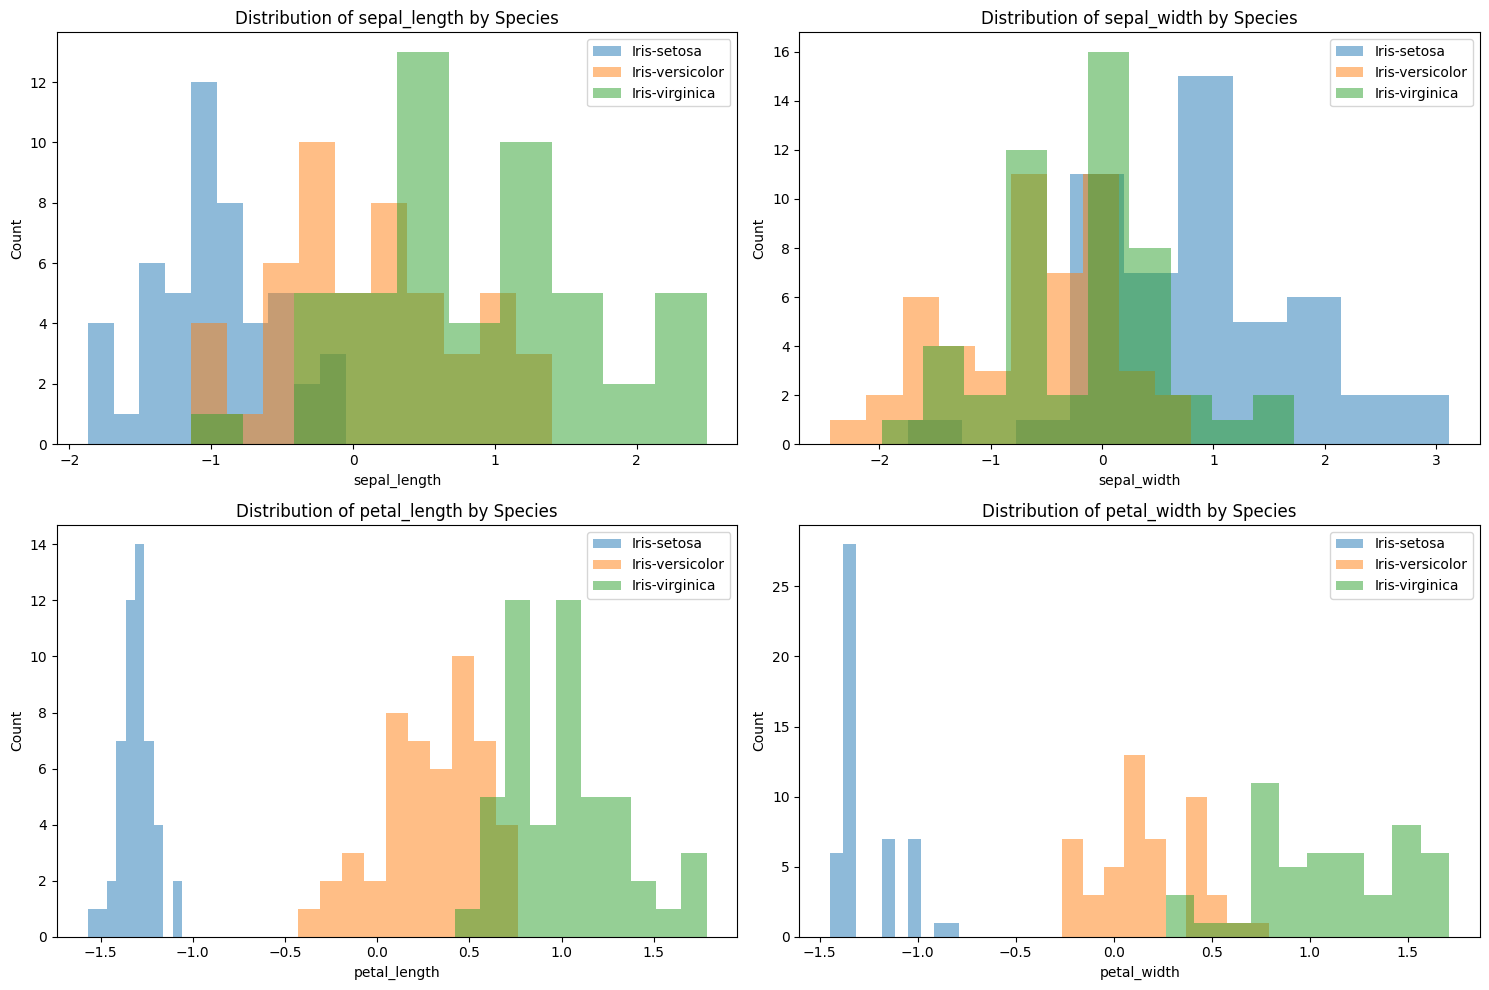

In [10]:
# Visualize the distribution of features by species
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i+1)
    for species in df['species'].unique():
        subset = df[df['species'] == species]
        plt.hist(subset[feature], alpha=0.5, label=species)
    plt.title(f'Distribution of {feature} by Species')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
plt.tight_layout()
plt.savefig('iris_distributions.png')